<a href="https://colab.research.google.com/github/thiagosilva85/nlp/blob/main/Analise_Texto_com_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Thiago Silva<br>
1922120026

A proposta do trabalho é realizar uma análise comparativa sobre o conteúdo dos documentos do plano de governo dos candidatos à presidência na eleição de 2022.

### Montando o ambiente para o trabalho

Montagem do Driver do Google para ter acesso aos diretórios

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Instalação das libs que não são nativas

In [1]:
!pip install pdfplumber -q

     |████████████████████████████████| 40 kB 3.0 MB/s 
     |████████████████████████████████| 3.1 MB 6.5 MB/s 
     |████████████████████████████████| 5.6 MB 11.3 MB/s 
     |████████████████████████████████| 142 kB 59.5 MB/s 
     |████████████████████████████████| 4.0 MB 44.8 MB/s 


In [31]:
!pip uninstall Pillow
!pip install Pillow

Found existing installation: Pillow 9.2.0
Uninstalling Pillow-9.2.0:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/PIL/*
    /usr/local/lib/python3.7/dist-packages/Pillow-9.2.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/Pillow.libs/libXau-00ec42fe.so.6.0.0
    /usr/local/lib/python3.7/dist-packages/Pillow.libs/libfreetype-27ef11b8.so.6.18.3
    /usr/local/lib/python3.7/dist-packages/Pillow.libs/libharfbuzz-aa5f3c5c.so.0.40401.0
    /usr/local/lib/python3.7/dist-packages/Pillow.libs/libjpeg-3e290cba.so.62.3.0
    /usr/local/lib/python3.7/dist-packages/Pillow.libs/liblcms2-1e643a89.so.2.0.13
    /usr/local/lib/python3.7/dist-packages/Pillow.libs/liblzma-d540a118.so.5.2.5
    /usr/local/lib/python3.7/dist-packages/Pillow.libs/libopenjp2-fca9bf24.so.2.5.0
    /usr/local/lib/python3.7/dist-packages/Pillow.libs/libpng16-52f22300.so.16.37.0
    /usr/local/lib/python3.7/dist-packages/Pillow.libs/libtiff-3a0dc242.so.5.8.0
    /usr/local/lib/python3.7/dist-packages/Pillo

In [28]:
!pip install -q goose3

     |████████████████████████████████| 88 kB 2.7 MB/s 
     |████████████████████████████████| 981 kB 22.9 MB/s 
     |████████████████████████████████| 106 kB 41.2 MB/s 


Importação das libs a serem usadas no trabalho

In [2]:
import pandas as pd
import numpy as np
import re
import os

import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from collections import defaultdict, Counter

import pdfplumber
import nltk

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from goose3 import Goose

### Iniciando a coleta e tratamento dos dados

Coletando o dataset 

In [ ]:
!wget -P '/content/drive/MyDrive/7o_semestre/NLP/Trabalho1' \
https://github.com/alexvaroz/data_science_alem_do_basico/raw/master/planos_governo_eleicoes_2022.zip

--2022-09-23 01:44:30--  https://github.com/alexvaroz/data_science_alem_do_basico/raw/master/planos_governo_eleicoes_2022.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alexvaroz/data_science_alem_do_basico/master/planos_governo_eleicoes_2022.zip [following]
--2022-09-23 01:44:30--  https://raw.githubusercontent.com/alexvaroz/data_science_alem_do_basico/master/planos_governo_eleicoes_2022.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14376349 (14M) [application/zip]
Saving to: ‘/content/drive/MyDrive/7o_semestre/NLP/Trabalho1/planos_governo_eleicoes_2022.zip’

planos_governo_elei 100%

Extração do conteúdo do arquivo zip

In [ ]:
!unzip '/content/drive/MyDrive/7o_semestre/NLP/Trabalho1/planos_governo_eleicoes_2022.zip' -d \
'/content/drive/MyDrive/7o_semestre/NLP/Trabalho1/'

Archive:  /content/drive/MyDrive/7o_semestre/NLP/Trabalho1/planos_governo_eleicoes_2022.zip
  inflating: /content/drive/MyDrive/7o_semestre/NLP/Trabalho1/planos_governo/Plano_PUP.pdf  
  inflating: /content/drive/MyDrive/7o_semestre/NLP/Trabalho1/planos_governo/Plano_PTB.pdf  
  inflating: /content/drive/MyDrive/7o_semestre/NLP/Trabalho1/planos_governo/Plano_DC.pdf  
  inflating: /content/drive/MyDrive/7o_semestre/NLP/Trabalho1/planos_governo/Plano_NOVO.pdf  
  inflating: /content/drive/MyDrive/7o_semestre/NLP/Trabalho1/planos_governo/Plano_UNIAOBR.pdf  
  inflating: /content/drive/MyDrive/7o_semestre/NLP/Trabalho1/planos_governo/Plano_MDB.pdf  
  inflating: /content/drive/MyDrive/7o_semestre/NLP/Trabalho1/planos_governo/plano_PROS.pdf  
  inflating: /content/drive/MyDrive/7o_semestre/NLP/Trabalho1/planos_governo/Plano_PSTU.pdf  
  inflating: /content/drive/MyDrive/7o_semestre/NLP/Trabalho1/planos_governo/PlanoPT.pdf  
  inflating: /content/drive/MyDrive/7o_semestre/NLP/Trabalho1/plano

### Checando a carga realizada para validar o processo de extração dos dados

Antes de iniciar o processamento dos PDFs dos planos de governo com a lib *pdfplumber*, será feita uma extração simples e rápida de cada documento para validar o uso dos arquivos. Será feita uma checagem do conteúdo extraído na primeira página de cada documento. Se houver conteúdo, o arquivo pode ser usados, caso contrário, será ver outra possibilidade.

In [3]:
path = '/content/drive/MyDrive/7o_semestre/NLP/Trabalho1/planos_governo/'
os.chdir(path)
listaArquivos = os.listdir(path)

for i in range(0,len(listaArquivos)):
  arquivoPdf = listaArquivos[i]
  pdf=pdfplumber.open(path+arquivoPdf)
  if pdf.pages[1].extract_text() != "":
    print(f"✔ Documento {arquivoPdf} validado!\n")
  else:
    print(f"❌ ATENÇÃO!!! O documento {arquivoPdf} foi INVALIDADO!\n")

✔ Documento Plano_MDB.pdf validado!

✔ Documento Plano_PUP.pdf validado!

✔ Documento Plano_PTB.pdf validado!

✔ Documento Plano_NOVO.pdf validado!

✔ Documento plano_PROS.pdf validado!

✔ Documento Plano_DC.pdf validado!

✔ Documento Plano_PL.pdf validado!

✔ Documento Plano_PCB.pdf validado!

✔ Documento PlanoPT.pdf validado!

✔ Documento Plano_UNIAOBR.pdf validado!

✔ Documento Plano_PSTU.pdf validado!

❌ ATENÇÃO!!! O documento Plano_PDT.pdf foi INVALIDADO!



Como o arquivo referente ao Plano de Governo do PDT não foi validado, foi preciso buscar uma outra fonte para ele. Em seguida, foi feita a verificação do seu conteúdo da mesma forma feita anteriormente.

In [4]:
os.mkdir('lixo')

In [9]:
# Novo arquivo encontrado no site Poder 360
!wget -P '/content/drive/MyDrive/7o_semestre/NLP/Trabalho1/planos_governo' \
https://static.poder360.com.br/2022/08/plano-ciro-tse-compactado_1.pdf

os.rename('/content/drive/MyDrive/7o_semestre/NLP/Trabalho1/planos_governo/plano-ciro-tse-compactado_1.pdf',\
          '/content/drive/MyDrive/7o_semestre/NLP/Trabalho1/planos_governo/Plano_PDT.pdf')


--2022-09-24 00:00:56--  https://static.poder360.com.br/2022/08/plano-ciro-tse-compactado_1.pdf
Resolving static.poder360.com.br (static.poder360.com.br)... 104.22.40.220, 104.22.41.220, 172.67.20.129, ...
Connecting to static.poder360.com.br (static.poder360.com.br)|104.22.40.220|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5639027 (5.4M) [application/pdf]
Saving to: ‘/content/drive/MyDrive/7o_semestre/NLP/Trabalho1/planos_governo/plano-ciro-tse-compactado_1.pdf’

plano-ciro-tse-comp 100%[===================>]   5.38M  23.2MB/s    in 0.2s    

2022-09-24 00:00:56 (23.2 MB/s) - ‘/content/drive/MyDrive/7o_semestre/NLP/Trabalho1/planos_governo/plano-ciro-tse-compactado_1.pdf’ saved [5639027/5639027]



Validando o novo arquivo carregado

In [10]:
arquivoPdf = 'Plano_PDT.pdf'
pdf=pdfplumber.open(path+arquivoPdf)
if pdf.pages[1].extract_text() != "":
  print(f"✔ Documento {arquivoPdf} validado!\n")
else:
  print(f"❌ ATENÇÃO!!! O documento {arquivoPdf} foi INVALIDADO!\n")

✔ Documento Plano_PDT.pdf validado!



Com todos os arquivos validados, será possível iniciar a extração massiva visando a estruturação dos dados de modo a permitir a análise do conteúdo dos documentos.<br><br>
Inicialmente será feita a extração do texto de todos os planos de governo e a montagem de um dataset baseado no seguinte pipeline:

- Extração do conteúdo
- Remoção de stopwords
- O texto será todo convertido para minúsculo
- Será removida toda a pontuação
- Em seguida, a tokenização
- Por fim, a contagem das palavras de cada candidato

In [18]:
df_final=pd.DataFrame(columns=['Palavra','Quantidade','Plano'])

nltk.download('stopwords')

for i in range(0,len(listaArquivos)):
  arquivoPdf = listaArquivos[i]
  print("Iniciado leitura do plano de Governo - "+arquivoPdf)
  # Extração do conteúdo do PDF
  pdf=pdfplumber.open(path+arquivoPdf)
  conteudo=''
  for item in pdf.pages:
    conteudo=conteudo+item.extract_text()
  # Remoção de stopwords com base no idioma Português
  stopwords = nltk.corpus.stopwords.words('portuguese')
  # Conversão do conteúdo para minúsculo
  conteudo = conteudo.lower()
  # Remoção de pontuação
  conteudo = re.sub(r'[^\w\s]',' ', conteudo)
  # Tokenização
  conteudo = re.findall(r'\w+',conteudo)
  conteudo_limpo=[]
  for item in conteudo:
    if (item not in stopwords) & (len(item)>1):
      conteudo_limpo.append(item)
  # Contagem das palavras
  conteudo_limpo=Counter(conteudo_limpo)
  # Seleção das 30 palavras mais comuns
  conteudo_limpo=conteudo_limpo.most_common(30)
  # Montagem do dataframe
  df=pd.DataFrame(conteudo_limpo, columns=['Palavra','Quantidade'])
  plano=re.sub('.pdf','',listaArquivos[i])
  df['Plano'] = plano
  df_final=pd.concat([df_final,df], ignore_index=True)
  i=i+1

print("\nTodos os planos de governo foram lidos e tratados.")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Iniciado leitura do plano de Governo - Plano_MDB.pdf
Iniciado leitura do plano de Governo - Plano_PUP.pdf
Iniciado leitura do plano de Governo - Plano_PTB.pdf
Iniciado leitura do plano de Governo - Plano_NOVO.pdf
Iniciado leitura do plano de Governo - plano_PROS.pdf
Iniciado leitura do plano de Governo - Plano_DC.pdf
Iniciado leitura do plano de Governo - Plano_PL.pdf
Iniciado leitura do plano de Governo - Plano_PCB.pdf
Iniciado leitura do plano de Governo - PlanoPT.pdf
Iniciado leitura do plano de Governo - Plano_UNIAOBR.pdf
Iniciado leitura do plano de Governo - Plano_PSTU.pdf
Iniciado leitura do plano de Governo - Plano_PDT.pdf

Todos os planos de governo foram lidos e tratados.


Verificando o arquivo criado...

In [23]:
df_final.head()

,Palavra,Quantidade,Plano
0,nacional,38,Plano_MDB
1,governo,32,Plano_MDB
2,social,27,Plano_MDB
3,promover,27,Plano_MDB
4,políticas,26,Plano_MDB


Validando que, de fato, todos os Planos de Governo foram criados...

In [88]:
df_final.groupby('Plano')['Plano'].nunique()

Plano
PlanoPT          1
Plano_DC         1
Plano_MDB        1
Plano_NOVO       1
Plano_PCB        1
Plano_PDT        1
Plano_PL         1
Plano_PSTU       1
Plano_PTB        1
Plano_PUP        1
Plano_UNIAOBR    1
plano_PROS       1
Name: Plano, dtype: int64

### Início da análise

Como a quantidade foi contada para cada Plano de Governo em separado, é preciso sumarizar esses dados para obter a quantidade de vezes em que aquela palavra foi mencionadas em todos os documentos.

In [95]:
df_agg = df_final.groupby('Palavra')['Palavra','Quantidade'].sum()
df = pd.DataFrame(df_agg, columns=['Descarte','Quantidade'])
df.reset_index(inplace=True)
df = df.drop('Descarte', axis=1)
df = df.sort_values(by=['Quantidade'], ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Gráfico com as 30 palavras mais mencionadas nos Planos de Governo

In [97]:
fig = px.bar(df.head(30), \
             x='Palavra', \
             y='Quantidade', \
             title='30 palavras mais mencionadas nos Planos de Governo')
fig.show()

Nuvem de palavras com as mais mencionadas nos Planos de Governo

In [80]:
words = df_final['Palavra']
all_words = ' '.join(w for w in words)

In [81]:
mask = np.array(Image.open('/content/drive/MyDrive/7o_semestre/NLP/Trabalho1/br.jpg'))

In [82]:
wc = WordCloud(stopwords = STOPWORDS,
               mask = mask, background_color = "white",
               max_words = 2000, max_font_size = 500,
               random_state = 42, width = mask.shape[1],
               height = mask.shape[0])

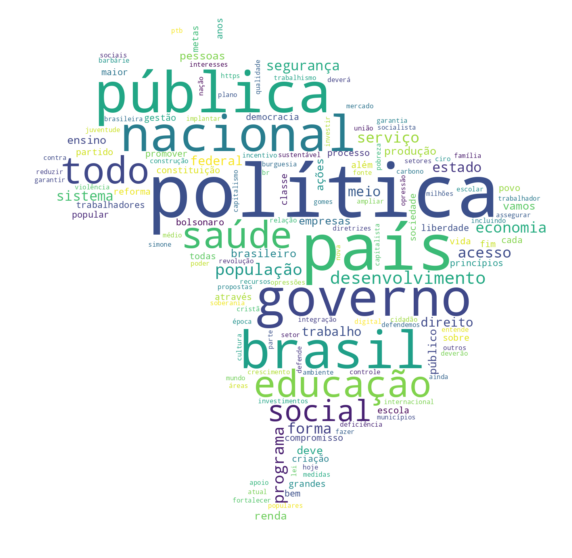

In [83]:
wc.generate(all_words)
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(wc, interpolation="bilinear")
ax.axis('off')
plt.show()

Quantas vezes as 10 palavras mais citadas no geral, apareceram em cada Plano de Governo?

In [142]:
df_pivot = df_final.pivot_table(values='Quantidade', index = 'Palavra',
                     columns= 'Plano',
                     aggfunc= 'sum')
df_pivot = df_pivot.fillna(0)
df_pivot['Total'] = df_pivot.sum(axis=1, skipna=True)
df_pivot = df_pivot.sort_values(by=['Total'], ascending=False)
df_pivot = df_pivot.drop('Total', axis=1)

df_pivot.head(10)

Plano,PlanoPT,Plano_DC,Plano_MDB,Plano_NOVO,Plano_PCB,Plano_PDT,Plano_PL,Plano_PSTU,Plano_PTB,Plano_PUP,Plano_UNIAOBR,plano_PROS
Palavra,,,,,,,,,,,,
governo,29.0,10.0,32.0,37.0,0.0,42.0,257.0,24.0,0.0,8.0,27.0,24.0
brasil,44.0,0.0,19.0,78.0,26.0,15.0,129.0,21.0,15.0,0.0,53.0,34.0
país,39.0,6.0,25.0,42.0,48.0,25.0,76.0,67.0,9.0,13.0,22.0,27.0
nacional,30.0,12.0,38.0,0.0,0.0,18.0,104.0,0.0,11.0,21.0,67.0,15.0
desenvolvimento,28.0,11.0,24.0,0.0,28.0,20.0,97.0,0.0,0.0,0.0,33.0,29.0
saúde,14.0,8.0,21.0,44.0,25.0,15.0,85.0,0.0,0.0,12.0,29.0,0.0
social,37.0,9.0,27.0,0.0,29.0,11.0,75.0,0.0,0.0,16.0,29.0,0.0
políticas,46.0,9.0,26.0,18.0,24.0,13.0,69.0,0.0,0.0,0.0,0.0,15.0
programa,0.0,0.0,0.0,0.0,29.0,41.0,65.0,0.0,0.0,10.0,31.0,25.0


### Análise para um Plano de Governo específíco

Nesse momento, é possível escolher um Plano de Governo específico para verificar como fica a análise feita com relação às principais palavras abordadas nos documento.<br><br>
A escrita do nome do Plano deve ser exatamente como descrita abaixo:
- Plano_MDB
- Plano_PUP
- Plano_PTB
- Plano_NOVO
- plano_PROS
- Plano_DC
- Plano_PL
- Plano_PCB
- PlanoPT
- Plano_UNIAOBR
- Plano_PSTU
- Plano_PDT

Informe o Plano de Governo para que as análises sejam geradas: Plano_PDT


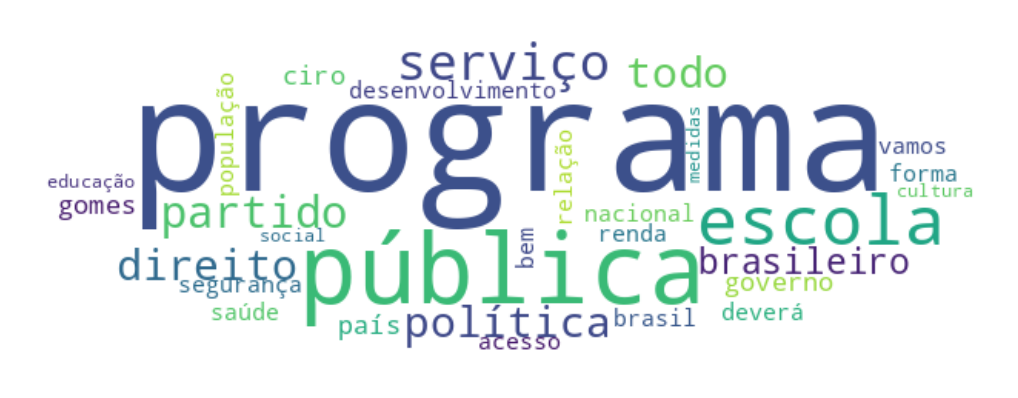

In [207]:
listaPlano = ['Plano_MDB','Plano_PUP','Plano_PTB','Plano_NOVO','plano_PROS','Plano_DC','Plano_PL','Plano_PCB','PlanoPT','Plano_UNIAOBR','Plano_PSTU','Plano_PDT']

plano = input('Informe o Plano de Governo para que as análises sejam geradas: ')

if plano in listaPlano:
  df_plano = df_pivot[plano]
  df_plano = pd.DataFrame(df_plano, columns=['Descarte',plano])
  df_plano.reset_index(inplace=True)
  df_plano = df_plano.drop('Descarte', axis=1)
  df_plano = df_plano.sort_values(by=[plano], ascending=False)

  #Nuvem de palavra
  mask = np.array(Image.open('/content/drive/MyDrive/7o_semestre/NLP/Trabalho1/elipse.JPG'))
  words = df_plano['Palavra']
  all_words = ' '.join(w for w in words)
  wc = WordCloud(stopwords = STOPWORDS,
                mask = mask, background_color = "white",
                max_words = 30, max_font_size = 500,
                random_state = 42, width = mask.shape[1],
                height = mask.shape[0])
  wc.generate(all_words)
  fig, ax = plt.subplots(figsize=(18,18))
  ax.imshow(wc, interpolation="bilinear")
  ax.axis('off')
  plt.show()

  #Gráfico de barras
  fig = px.bar(df_plano.head(30), \
              x='Palavra', \
              y=plano, \
              title='Detalhamento das 30 palavras mais mencionadas no Plano de Governo ('+df_plano.columns[1]+")")
  fig.show()

else:
  print('Plano de Governo não encontrado! \nTente novamente.')
